In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<div style="font-size: 36px;">
Importação dos datasets
</div>


In [80]:
df_bts = pd.read_csv('project_files/02_pre_processed_files/bts.csv')
df_test_alunos = pd.read_csv('project_files/02_pre_processed_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('project_files/02_pre_processed_files/meds_train_alunos.csv')

<div style="font-size: 36px;">
Identificação de proporção de nulos e a tipagem dos dados
</div>

In [81]:
df_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9 non-null      int64  
 1   id_localizacao_setor    9 non-null      int64  
 2   id_bts                  9 non-null      object 
 3   nom_bts                 9 non-null      object 
 4   num_lat_bts             9 non-null      float64
 5   num_long_bts            9 non-null      float64
 6   nom_canal_controle_bts  9 non-null      int64  
 7   num_azimuth             9 non-null      int64  
 8   id_rrsi                 9 non-null      object 
dtypes: float64(2), int64(4), object(3)
memory usage: 780.0+ bytes


In [82]:
df_test_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2904 non-null   int64  
 1   id_ponto      2904 non-null   int64  
 2   rssi_1_1      2904 non-null   float64
 3   rssi_1_2      2904 non-null   float64
 4   rssi_1_3      2904 non-null   float64
 5   rssi_2_1      2904 non-null   float64
 6   rssi_2_2      2904 non-null   float64
 7   rssi_2_3      2904 non-null   float64
 8   rssi_3_1      2904 non-null   float64
 9   rssi_3_2      2904 non-null   float64
 10  rssi_3_3      2904 non-null   float64
 11  delay_1       2904 non-null   float64
 12  delay_2       2904 non-null   float64
 13  delay_3       2904 non-null   float64
 14  num_lat_bts   2904 non-null   float64
 15  num_long_bts  2904 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 363.1 KB


In [83]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6775 non-null   int64  
 1   id_ponto      6775 non-null   int64  
 2   rssi_1_1      6775 non-null   float64
 3   rssi_1_2      6775 non-null   float64
 4   rssi_1_3      6775 non-null   float64
 5   rssi_2_1      6775 non-null   float64
 6   rssi_2_2      6775 non-null   float64
 7   rssi_2_3      6775 non-null   float64
 8   rssi_3_1      6775 non-null   float64
 9   rssi_3_2      6775 non-null   float64
 10  rssi_3_3      6775 non-null   float64
 11  delay_1       6775 non-null   float64
 12  delay_2       6775 non-null   float64
 13  delay_3       6775 non-null   float64
 14  num_lat_bts   6775 non-null   float64
 15  num_long_bts  6775 non-null   float64
 16  flag_indoor   6775 non-null   bool   
dtypes: bool(1), float64(14), int64(2)
memory usage: 853.6 KB


<div style="font-size: 36px;">
Verificação de dados duplicados
</div>

In [84]:
df_train_alunos[df_train_alunos.duplicated()]

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor


In [85]:
df_test_alunos[df_test_alunos.duplicated()]

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts


<div style="font-size: 36px;">
Análise de Medidas Estatísticas
</div>

In [86]:
df_train_alunos.describe()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,3387.000000,4856.099779,-100.789923,-105.688802,-100.545198,-103.524786,-97.210290,-97.193499,-93.644749,-93.353728,-107.478361,4.679410,3.159262,2.504945,-8.054510,-34.951792
std,1955.918369,2785.645694,10.025728,10.397924,9.968138,13.367328,8.853480,9.992950,7.688089,8.110877,11.003407,0.911469,1.009927,1.095094,0.002388,0.002310
min,0.000000,1.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.140000,-115.630000,-115.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850
25%,1693.500000,2434.500000,-107.650000,-115.000000,-107.148571,-115.000000,-102.202857,-101.652857,-99.480000,-99.005000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,3387.000000,4875.000000,-103.040000,-110.425000,-99.750000,-108.430000,-97.170000,-95.615714,-94.785000,-95.688000,-115.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597
75%,5080.500000,7272.500000,-93.455000,-97.350000,-93.340000,-96.817917,-92.080000,-91.951429,-89.375000,-89.610500,-97.600000,5.000000,3.000000,3.000000,-8.055310,-34.951331
max,6774.000000,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.046420,-34.945110


In [87]:
df_test_alunos.describe()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,1451.500000,4799.106405,-101.193782,-106.116658,-100.985157,-104.170058,-97.634788,-97.628303,-93.751564,-93.358305,-107.703493,4.676653,3.121901,2.535124,-8.054552,-34.951807
std,838.456916,2814.236124,9.850651,10.158505,9.761652,12.914444,8.654757,9.933887,7.567520,8.045403,10.945147,0.928623,1.002726,1.134803,0.002327,0.002297
min,0.000000,0.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-107.153333,-107.960000,-115.000000,1.000000,0.000000,0.000000,-8.059490,-34.959840
25%,725.750000,2361.000000,-107.650000,-115.000000,-107.148571,-115.000000,-102.805000,-102.874286,-99.480000,-99.034000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,1451.500000,4765.500000,-103.705000,-110.425000,-100.215000,-108.430000,-97.200000,-95.780000,-94.973333,-95.755000,-115.000000,5.000000,3.000000,2.000000,-8.055506,-34.951597
75%,2177.250000,7210.250000,-94.474286,-97.485893,-93.890938,-97.560000,-92.550000,-92.514286,-89.860000,-88.874000,-97.600000,5.000000,3.000000,3.000000,-8.055380,-34.951331
max,2903.000000,9678.000000,-67.010000,-65.390000,-65.570000,-45.020000,-61.420000,-59.110000,-60.470000,-59.630000,-52.540000,7.000000,7.000000,7.000000,-8.046430,-34.945110


<div style="font-size: 36px;">
Análises dos dados de treino
</div>

In [88]:
# Configuração  de estilo do Seaborn
sns.set(style="whitegrid")

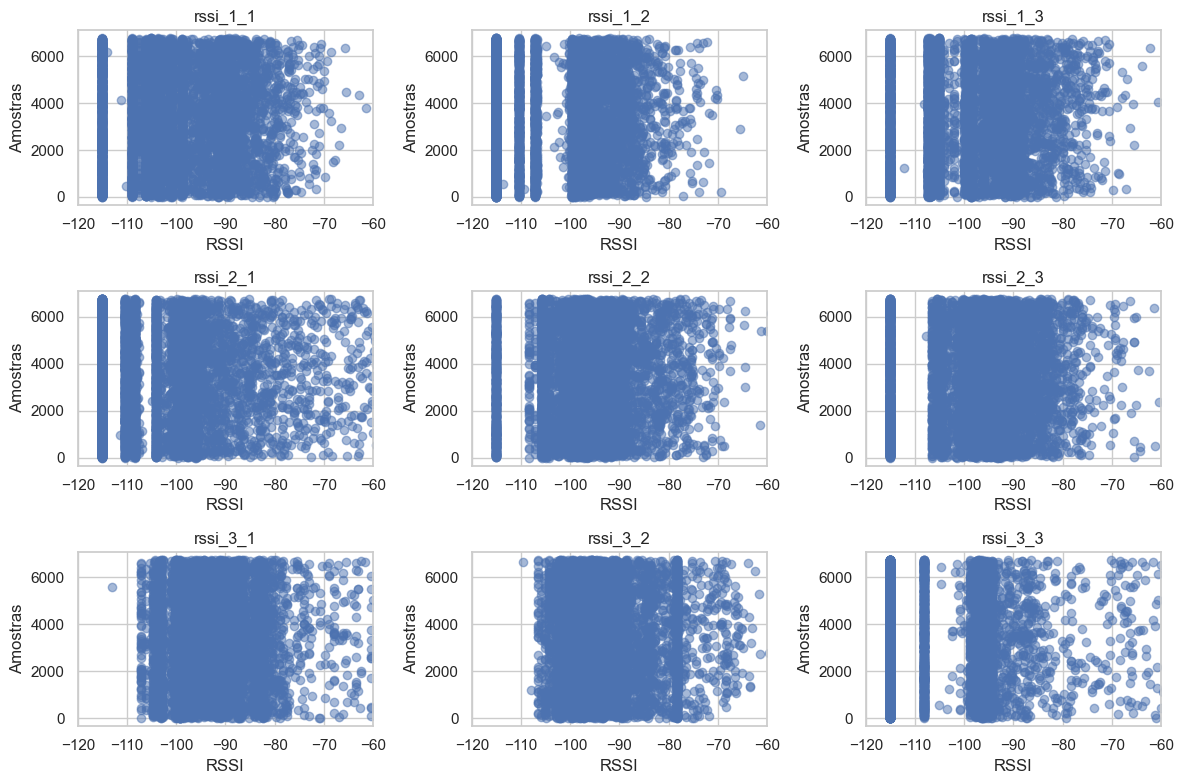

In [104]:
#Análise de outliers

# Selecionar as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

# Plot de gráficos de dispersão para verificar outliers em cada coluna de RSSI
plt.figure(figsize=(12, 8))
for col in columns:
    plt.subplot(3, 3, columns.index(col) + 1)  # Organizar os subplots em uma grade 3x3
    plt.scatter(df_train_alunos[col], range(len(df_train_alunos)), alpha=0.5)
    plt.title(col)
    plt.xlabel('RSSI')
    plt.ylabel('Amostras')
    plt.xlim(-120, -60)  # Define o limite do eixo y de -120 a -60

plt.tight_layout()
plt.show()

In [90]:
#Análise linha a linha para identificarmos valores muito diferentes entre si dentro da mesma antena


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Definir um limite para considerar valores como próximos
limite = 40  # Ajuste conforme necessário

# Criar uma lista de índices das linhas a serem removidas
indices_a_remover = []

# Para cada grupo
for group_name, group_columns in group_mapping.items():
    # Selecionar apenas as colunas do grupo atual
    df_group = df_train_alunos[group_columns].copy()
    
    # Calcular a diferença máxima em cada linha
    df_group['Max_Diff'] = df_group.max(axis=1) - df_group.min(axis=1)
    
    # Verificar se a diferença está acima do limite e marcar os índices para remoção
    indices_linhas_fora_do_limite = df_group[df_group['Max_Diff'] > limite].index
    indices_a_remover.extend(indices_linhas_fora_do_limite)
    
    # Imprimir resultado
    print(f'Para o {group_name}:')
    print(f'{len(indices_linhas_fora_do_limite)}/{len(df_group)} linhas têm valores fora do limite (diferença máxima > {limite}).\n')

# Remover as linhas marcadas para remoção do DataFrame original
df_train_alunos = df_train_alunos.drop(indices_a_remover)

# O DataFrame df_train_alunos agora contém apenas as linhas que atendem ao critério de proximidade



Para o Grupo 1:
0/6775 linhas têm valores fora do limite (diferença máxima > 40).

Para o Grupo 2:
9/6775 linhas têm valores fora do limite (diferença máxima > 40).

Para o Grupo 3:
3/6775 linhas têm valores fora do limite (diferença máxima > 40).



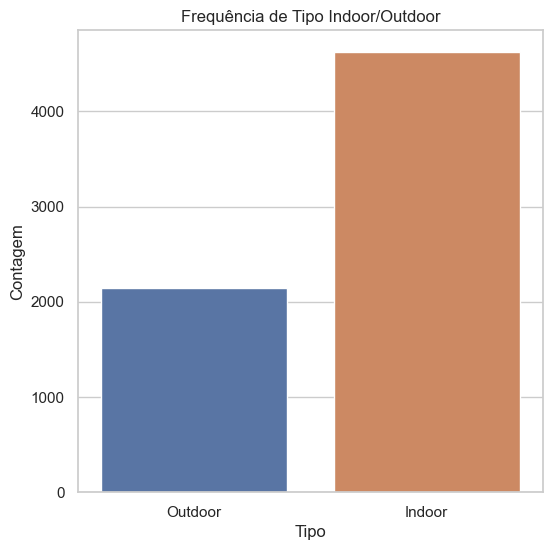

In [91]:
#Gráfico de barras que mostra a quantidade de casos em que cada tipo de coleta de sinal foi realizada ( indoor ou outdoor)

# Contagem de valores únicos em 'flag_indoor'
flag_indoor_count = df_train_alunos['flag_indoor'].value_counts()

# Plot de gráfico de barra
plt.figure(figsize=(6, 6))
sns.barplot(x=flag_indoor_count.index, y=flag_indoor_count.values)
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Frequência de Tipo Indoor/Outdoor')
plt.xticks([0, 1], ['Outdoor', 'Indoor'])
plt.show()

In [92]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6763 entries, 0 to 6774
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6763 non-null   int64  
 1   id_ponto      6763 non-null   int64  
 2   rssi_1_1      6763 non-null   float64
 3   rssi_1_2      6763 non-null   float64
 4   rssi_1_3      6763 non-null   float64
 5   rssi_2_1      6763 non-null   float64
 6   rssi_2_2      6763 non-null   float64
 7   rssi_2_3      6763 non-null   float64
 8   rssi_3_1      6763 non-null   float64
 9   rssi_3_2      6763 non-null   float64
 10  rssi_3_3      6763 non-null   float64
 11  delay_1       6763 non-null   float64
 12  delay_2       6763 non-null   float64
 13  delay_3       6763 non-null   float64
 14  num_lat_bts   6763 non-null   float64
 15  num_long_bts  6763 non-null   float64
 16  flag_indoor   6763 non-null   bool   
dtypes: bool(1), float64(14), int64(2)
memory usage: 904.8 KB


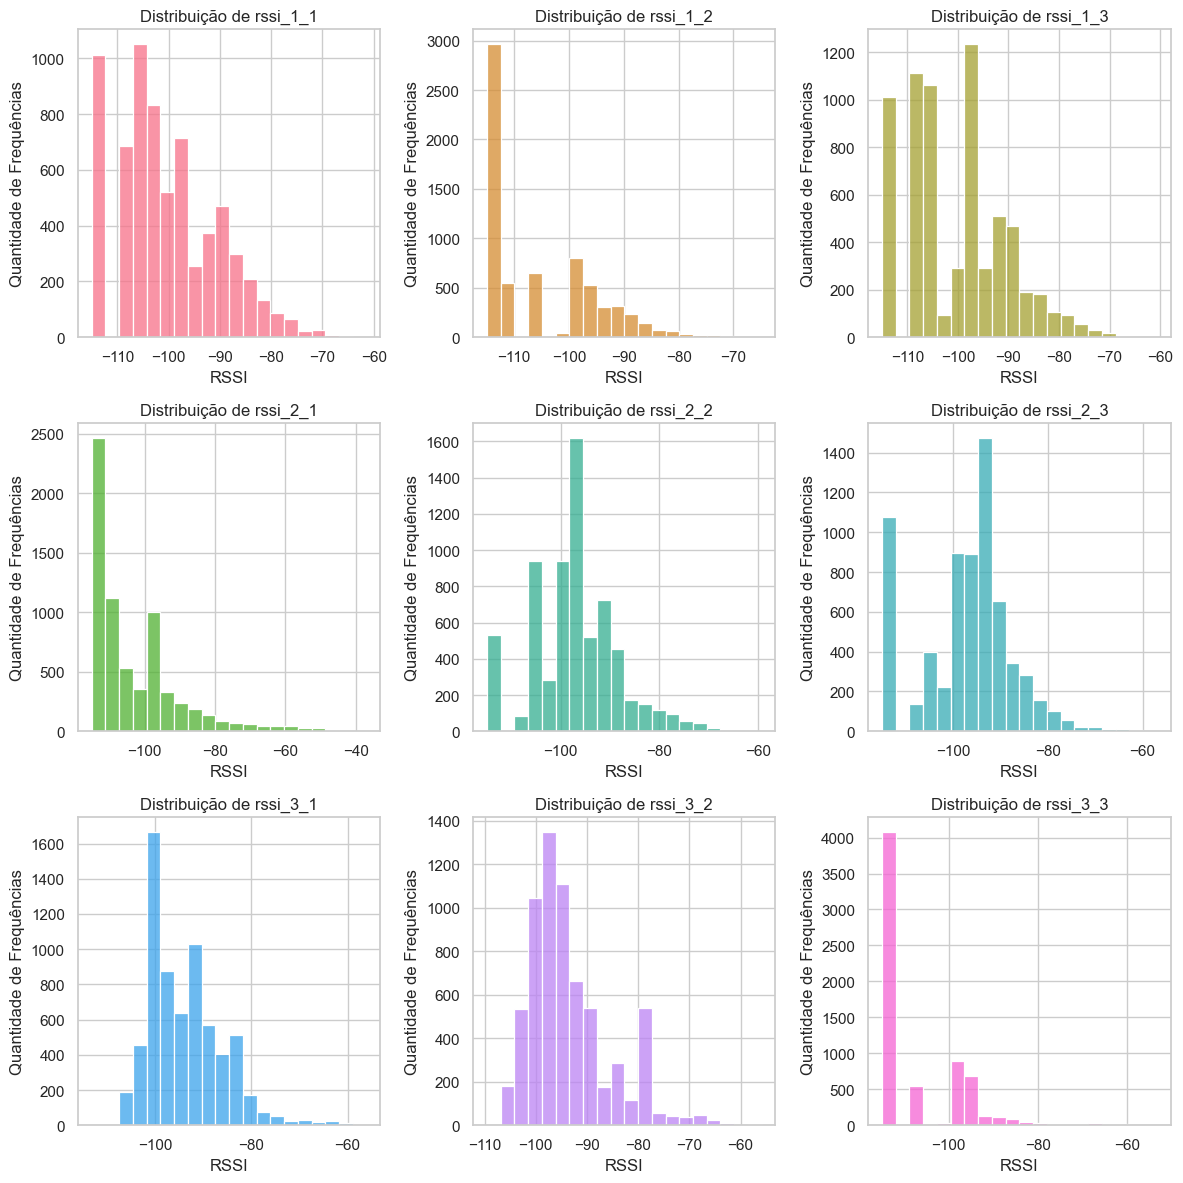

In [93]:
#Gráfico feito para entendermos melhor a distribuição dos dados, para tentarmos identificar padrões centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
data_selected = df_train_alunos[columns]

# Definir as cores
colors = sns.color_palette("husl", len(data_selected.columns))

# Criar subplots para cada coluna
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for col, ax, color in zip(data_selected.columns, axes.ravel(), colors):
    sns.histplot(data=data_selected[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

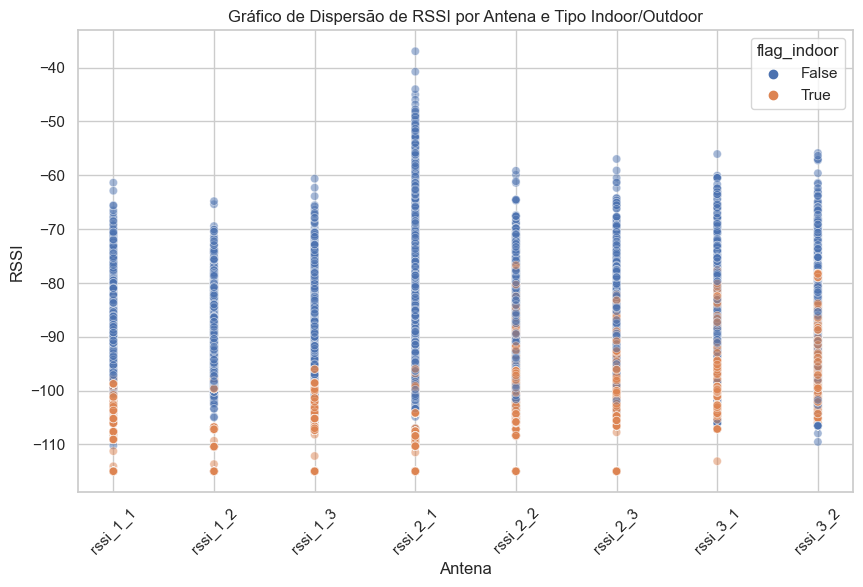

In [94]:
#O intuito do gráfico é a visualização da tendência do RSSI ao longo das antenas, e entendermos a correlação entre o valor do RSSI e a variável  indoor



# Derreter as colunas de RSSI e incluir a coluna 'flag_indoor'

columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
df_melted = df_train_alunos.melt(id_vars=['flag_indoor'], value_vars=columns[:-1], value_name='RSSI', var_name='Antena')

# Configurar o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

# Plot do gráfico de dispersão para todos os pontos individuais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Antena', y='RSSI', hue='flag_indoor', data=df_melted, alpha=0.5)
plt.xlabel('Antena')
plt.ylabel('RSSI')
plt.title('Gráfico de Dispersão de RSSI por Antena e Tipo Indoor/Outdoor')
plt.xticks(rotation=45)
plt.show()

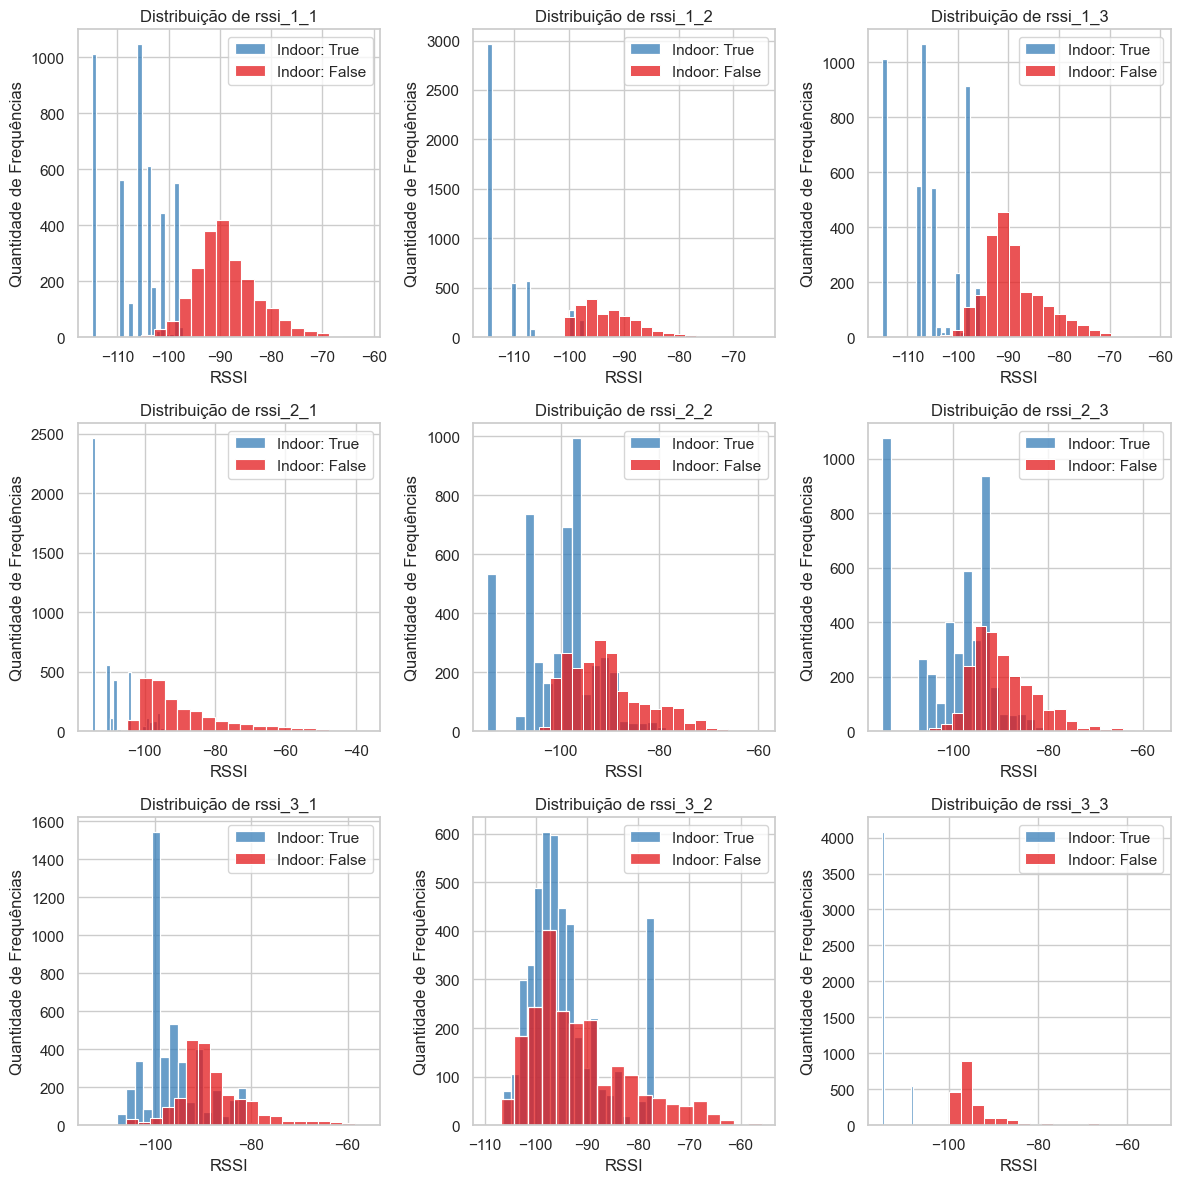

In [95]:
# Selecionar colunas relevantes e adicionar a coluna 'flag_indoor'
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3', 'flag_indoor']
data_selected = df_train_alunos[columns]


# Criar subplots para cada coluna de RSSI
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for col, ax in zip(data_selected.columns[:-1], axes.ravel()):
    for indoor_flag in [True, False]:
        subset_data = data_selected[data_selected['flag_indoor'] == indoor_flag][col]
        sns.histplot(data=subset_data, bins=20, kde=False, color=sns.color_palette("Set1")[indoor_flag], ax=ax, label=f'Indoor: {indoor_flag}')
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')
    ax.legend()

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

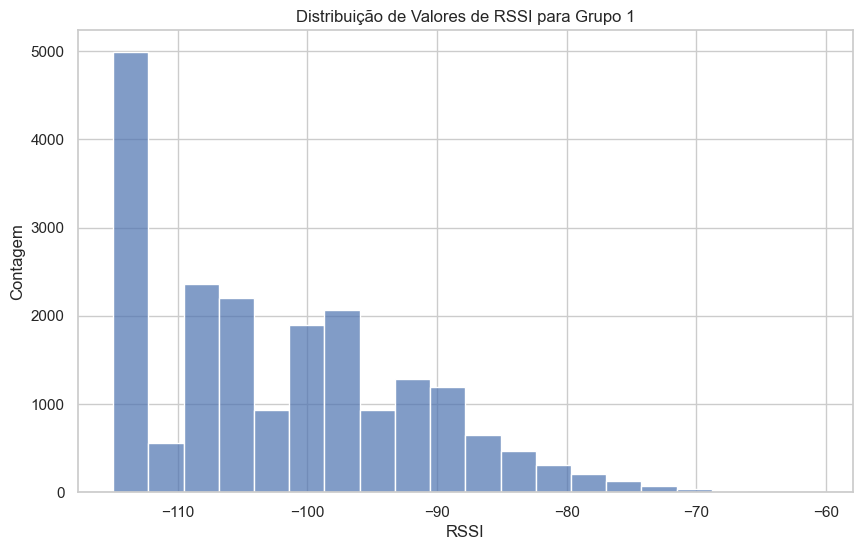

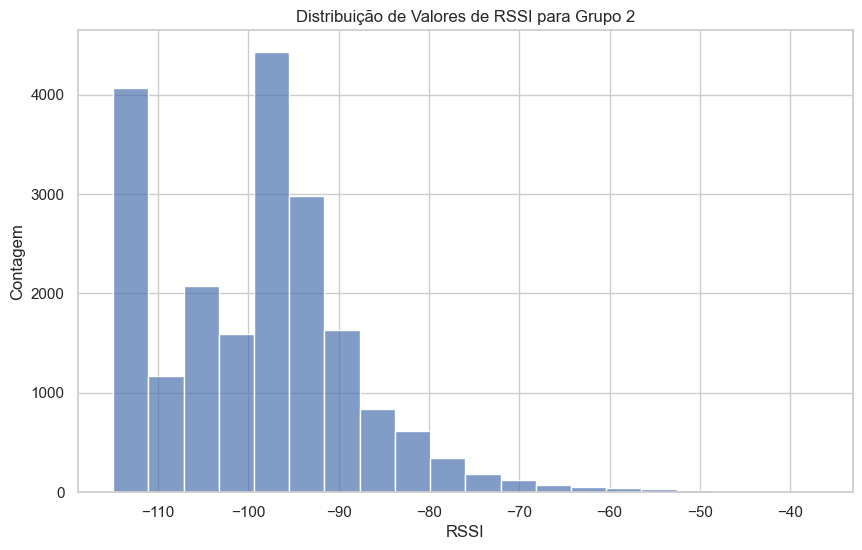

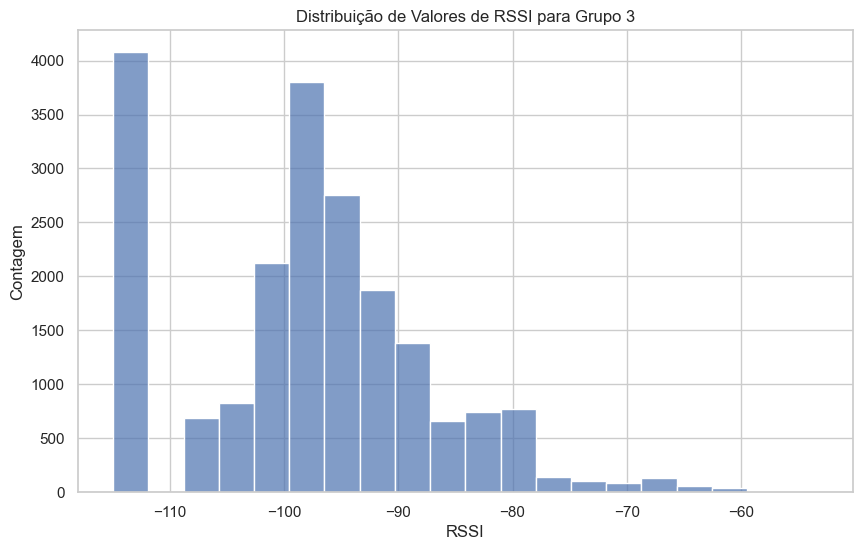

In [96]:
#Distribuição de valores de RSSi para os grupos de antenas 1,2,3


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição separados para cada grupo
for group_name, group_columns in group_mapping.items():
    plt.figure(figsize=(10, 6))
    df_group = df_train_alunos[group_columns].melt(value_name='RSSI', var_name='Antena')
    sns.histplot(data=df_group, x='RSSI', bins=20, alpha=0.7, multiple='stack')
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')
    plt.show()

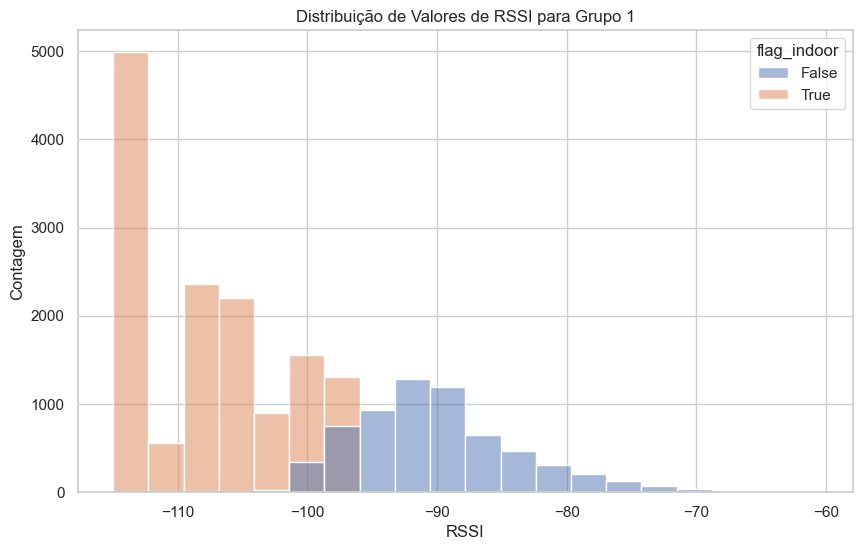

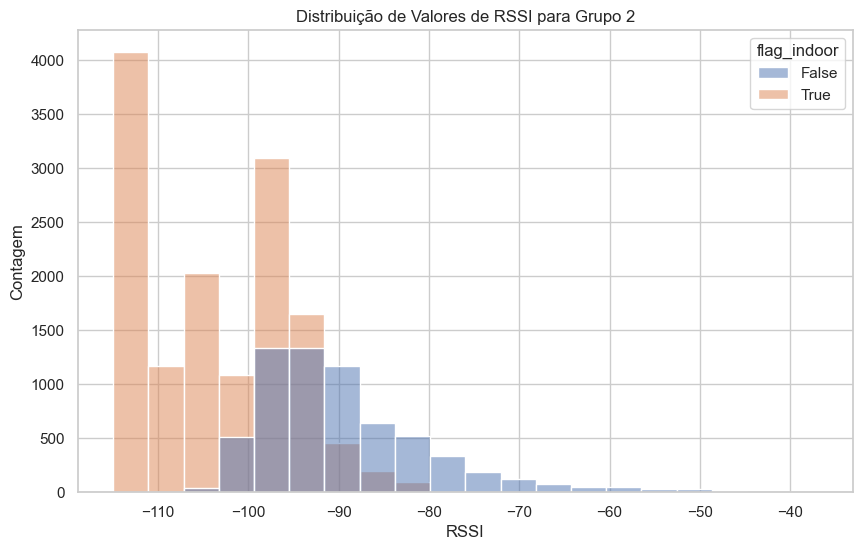

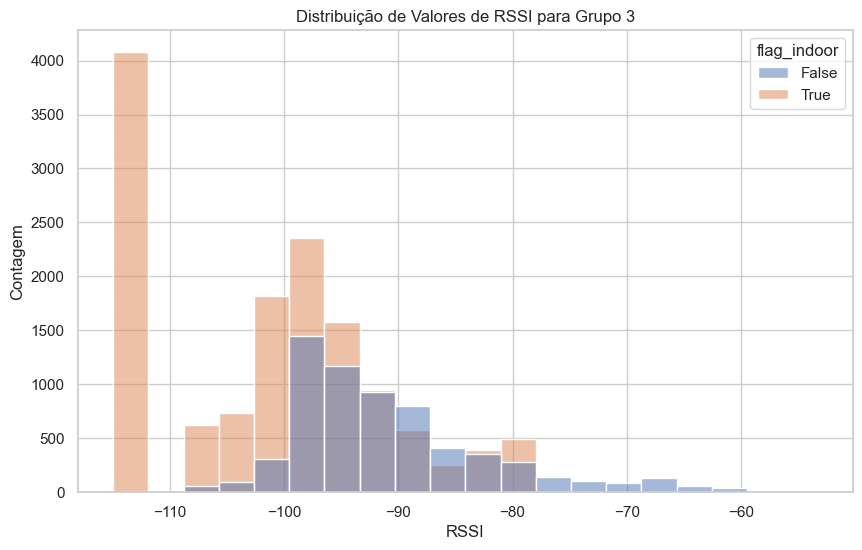

In [97]:
#Distribuição de valores de RSSi para os grupos de antenas 1,2,3 relacionadas à variável flag_indoor


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição para cada grupo
for group_name, group_columns in group_mapping.items():
    df_group = df_train_alunos.melt(id_vars=['flag_indoor'], value_vars=group_columns, value_name='RSSI', var_name='Antena')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_group, x='RSSI', hue='flag_indoor', bins=20, kde=False)
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')


    plt.show()

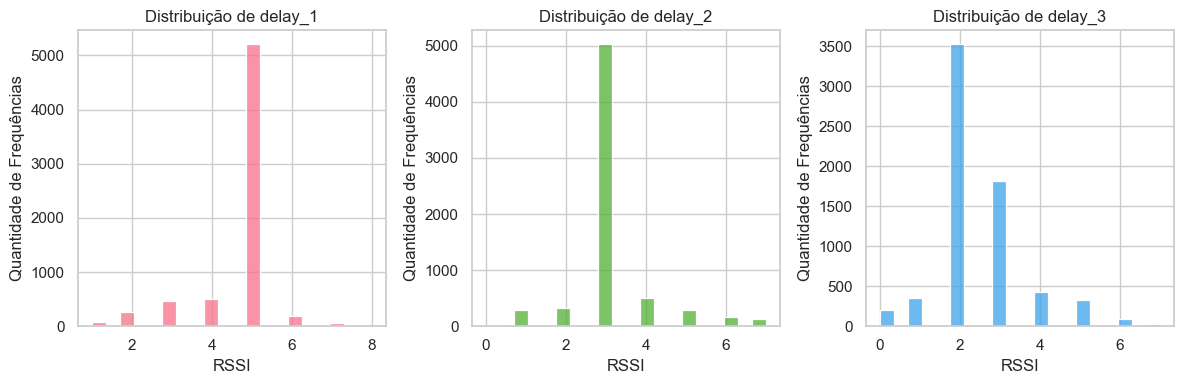

In [107]:
#Gráfico feito para entendermos melhor a distribuição dos dados, para tentarmos identificar padrões centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['delay_1', 'delay_2', 'delay_3']
data_selected = df_train_alunos[columns]

# Definir as cores
colors = sns.color_palette("husl", len(data_selected.columns))

# Criar subplots para cada coluna
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for col, ax, color in zip(data_selected.columns, axes.ravel(), colors):
    sns.histplot(data=data_selected[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

<div style="font-size: 36px;">
Análise de dados de teste
</div>

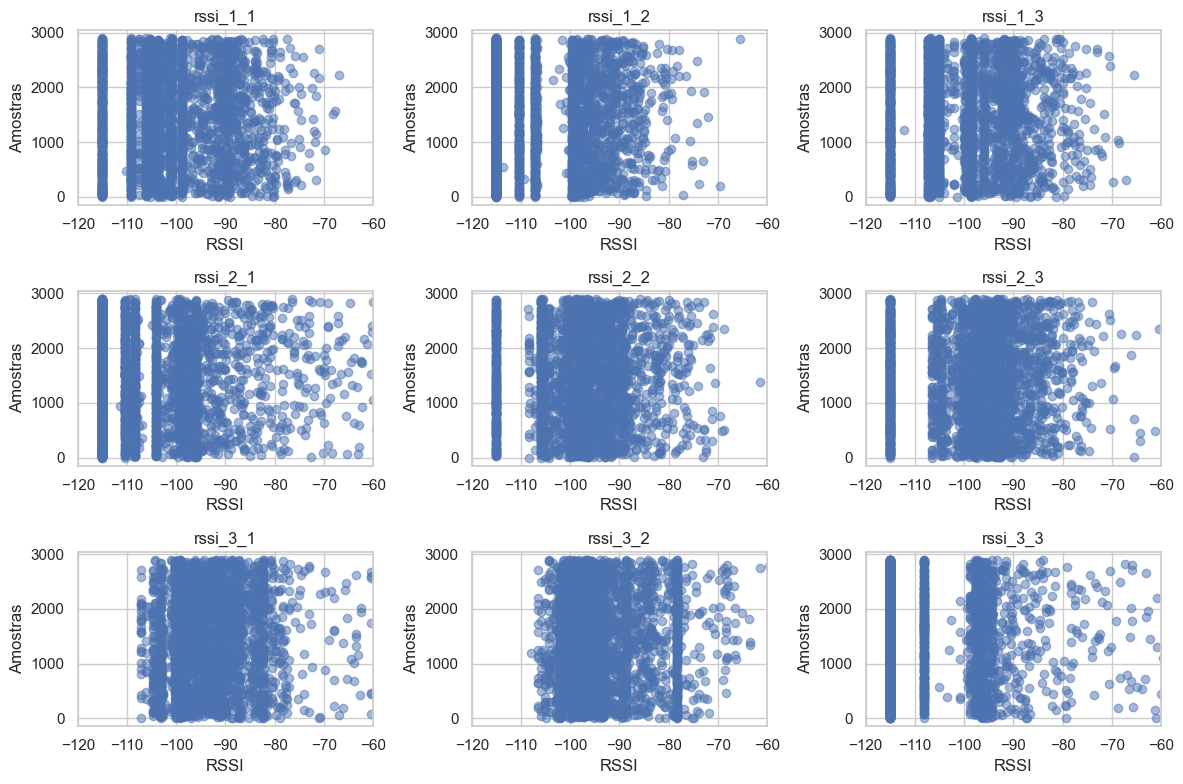

In [105]:
#Análise de outliers

# Selecionar as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

# Plot de gráficos de dispersão para verificar outliers em cada coluna de RSSI
plt.figure(figsize=(12, 8))
for col in columns:
    plt.subplot(3, 3, columns.index(col) + 1)  # Organizar os subplots em uma grade 3x3
    plt.scatter(df_test_alunos[col], range(len(df_test_alunos)), alpha=0.5)
    plt.title(col)
    plt.xlabel('RSSI')
    plt.ylabel('Amostras')
    plt.xlim(-120, -60)  # Define o limite do eixo y de -120 a -60

plt.tight_layout()
plt.show()

In [99]:
#Análise linha a linha para identificarmos valores muito diferentes entre si dentro da mesma antena


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Definir um limite para considerar valores como próximos
limite = 40  # Ajuste conforme necessário

# Criar uma lista de índices das linhas a serem removidas
indices_a_remover = []

# Para cada grupo
for group_name, group_columns in group_mapping.items():
    # Selecionar apenas as colunas do grupo atual
    df_group = df_test_alunos[group_columns].copy()
    
    # Calcular a diferença máxima em cada linha
    df_group['Max_Diff'] = df_group.max(axis=1) - df_group.min(axis=1)
    
    # Verificar se a diferença está acima do limite e marcar os índices para remoção
    indices_linhas_fora_do_limite = df_group[df_group['Max_Diff'] > limite].index
    indices_a_remover.extend(indices_linhas_fora_do_limite)
    
    # Imprimir resultado
    print(f'Para o {group_name}:')
    print(f'{len(indices_linhas_fora_do_limite)}/{len(df_group)} linhas têm valores fora do limite (diferença máxima > {limite}).\n')

# Remover as linhas marcadas para remoção do DataFrame original
df_test_alunos = df_test_alunos.drop(indices_a_remover)

# O DataFrame df_test_alunos agora contém apenas as linhas que atendem ao critério de proximidade



Para o Grupo 1:
0/2904 linhas têm valores fora do limite (diferença máxima > 40).

Para o Grupo 2:
3/2904 linhas têm valores fora do limite (diferença máxima > 40).

Para o Grupo 3:
2/2904 linhas têm valores fora do limite (diferença máxima > 40).



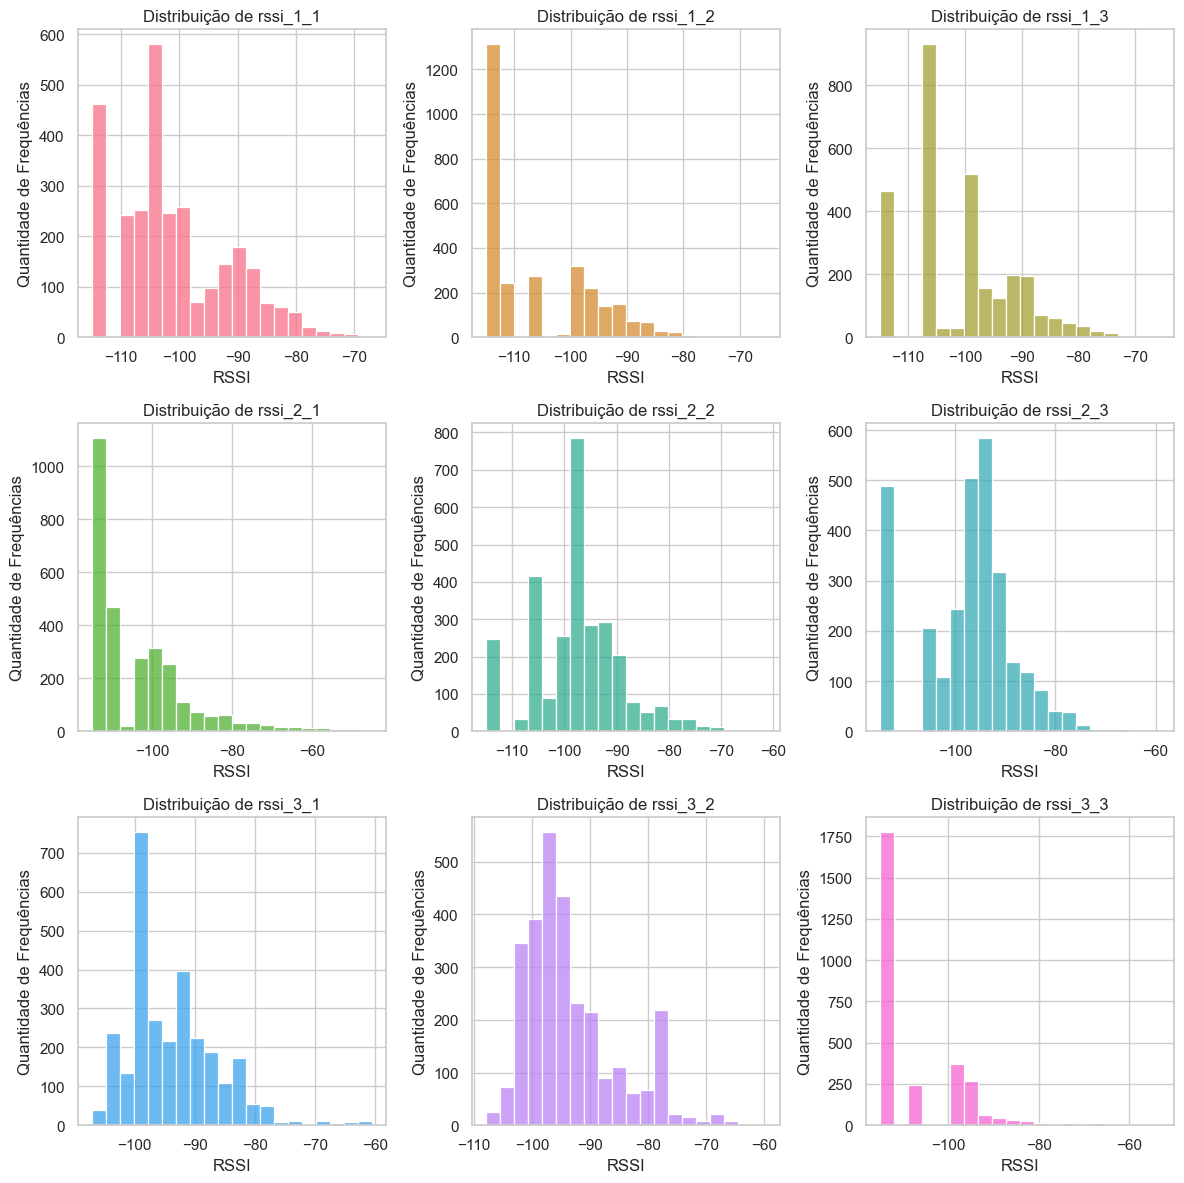

In [100]:
#Gráfico feito para entendermos melhor a distribuição dos dados, para tentarmos identificar padrões centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
data_selected = df_test_alunos[columns]

# Definir as cores
colors = sns.color_palette("husl", len(data_selected.columns))

# Criar subplots para cada coluna
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for col, ax, color in zip(data_selected.columns, axes.ravel(), colors):
    sns.histplot(data=data_selected[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

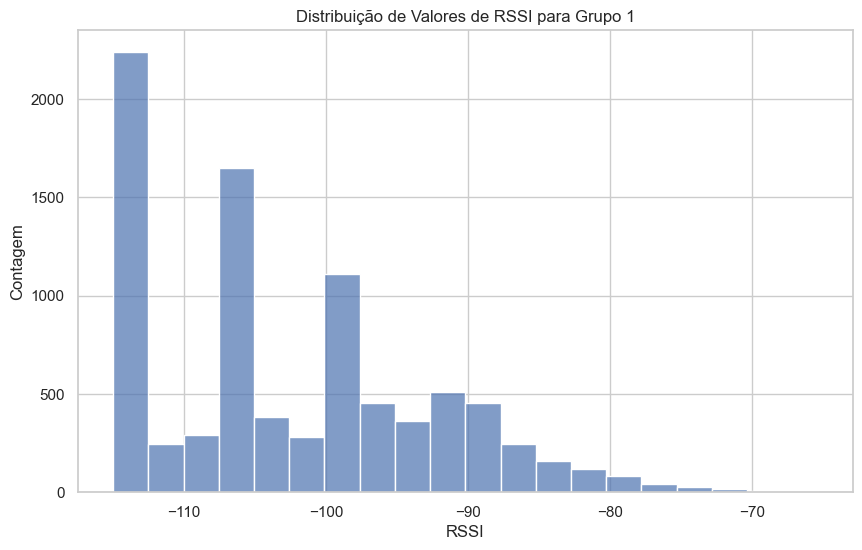

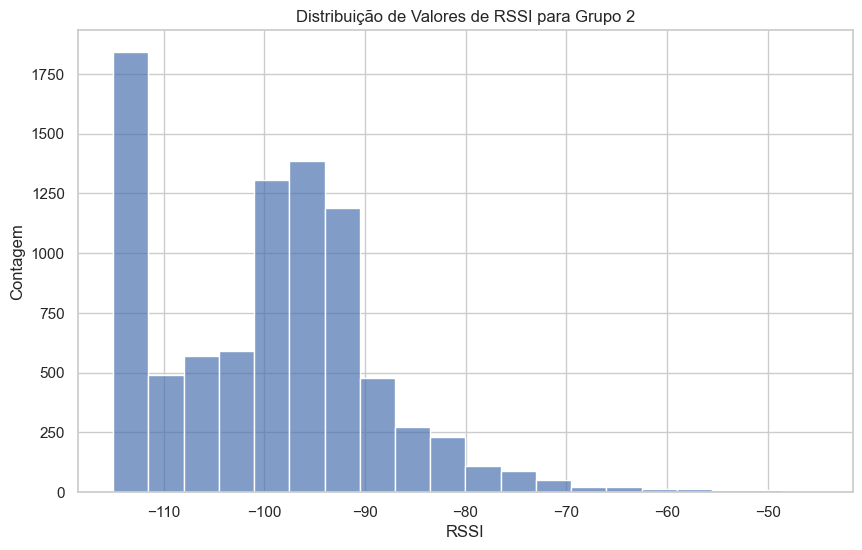

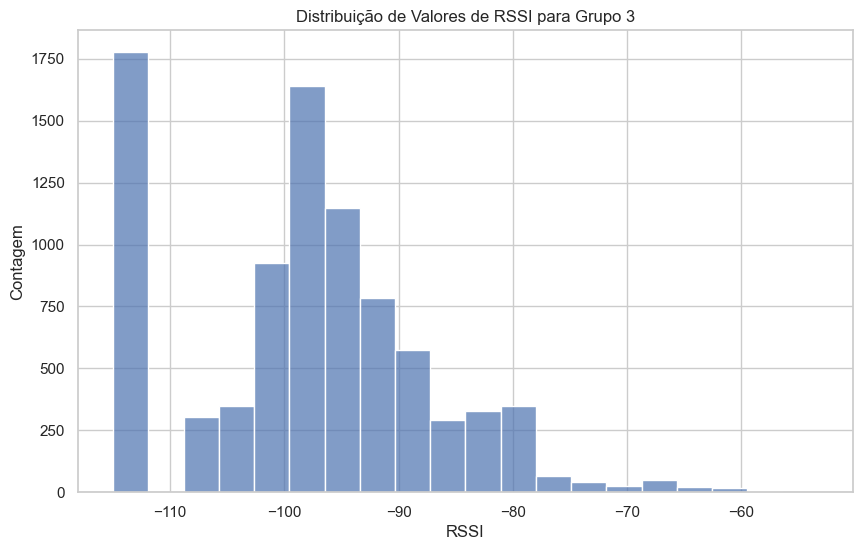

In [101]:
#Distribuição de valores de RSSi para os grupos de antenas 1,2,3


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição separados para cada grupo
for group_name, group_columns in group_mapping.items():
    plt.figure(figsize=(10, 6))
    df_group = df_test_alunos[group_columns].melt(value_name='RSSI', var_name='Antena')
    sns.histplot(data=df_group, x='RSSI', bins=20, alpha=0.7, multiple='stack')
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')
    plt.show()

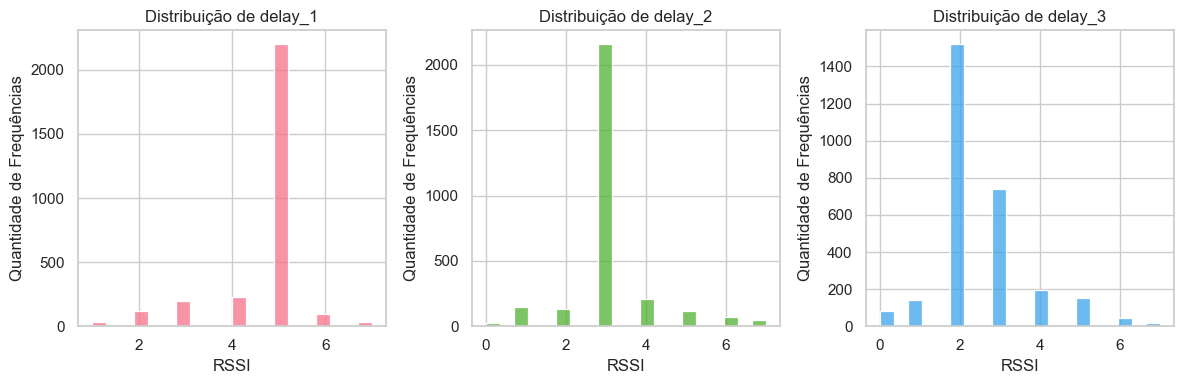

In [108]:
#Gráfico feito para entendermos melhor a distribuição dos dados, para tentarmos identificar padrões centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['delay_1', 'delay_2', 'delay_3']
data_selected = df_test_alunos[columns]

# Definir as cores
colors = sns.color_palette("husl", len(data_selected.columns))

# Criar subplots para cada coluna
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for col, ax, color in zip(data_selected.columns, axes.ravel(), colors):
    sns.histplot(data=data_selected[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

<div style="font-size: 36px;">
Exportação do dataframe final.
</div>

In [102]:
df_train_alunos.to_csv("project_files/03_processed_files/meds_train_alunos.csv")
df_test_alunos.to_csv("project_files/03_processed_files/meds_test_alunos.csv")
df_bts.to_csv("project_files/03_processed_files/bts.csv")